In [1]:
import pandas as pd

# Replace the file path with the actual path to your dataset
file_path = "Bicycle_Thefts_Open_Data_3945305316907060423.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

   OBJECTID EVENT_UNIQUE_ID   PRIMARY_OFFENCE               OCC_DATE  \
0         1  GO-20141263784  PROPERTY - FOUND    1/1/2014 5:00:00 AM   
1         2  GO-20141263544               B&E  12/26/2013 5:00:00 AM   
2         3  GO-20141261431       THEFT UNDER    1/1/2014 5:00:00 AM   
3         4  GO-20141267465       THEFT UNDER   9/30/2013 5:00:00 AM   
4         5  GO-20149000074       THEFT UNDER  12/25/2013 5:00:00 AM   

   OCC_YEAR  OCC_MONTH    OCC_DOW  OCC_DAY  OCC_DOY  OCC_HOUR  ... BIKE_COST  \
0      2014    January  Wednesday        1        1        18  ...       NaN   
1      2013   December   Thursday       26      360        19  ...    1300.0   
2      2014    January  Wednesday        1        1         7  ...       NaN   
3      2013  September     Monday       30      273         0  ...     750.0   
4      2013   December  Wednesday       25      359        16  ...    1500.0   

      STATUS HOOD_158             NEIGHBOURHOOD_158  HOOD_140  \
0  RECOVERED      080

In [2]:
df.dtypes

OBJECTID               int64
EVENT_UNIQUE_ID       object
PRIMARY_OFFENCE       object
OCC_DATE              object
OCC_YEAR               int64
OCC_MONTH             object
OCC_DOW               object
OCC_DAY                int64
OCC_DOY                int64
OCC_HOUR               int64
REPORT_DATE           object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DOW            object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_HOUR            int64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
BIKE_MAKE             object
BIKE_MODEL            object
BIKE_TYPE             object
BIKE_SPEED           float64
BIKE_COLOUR           object
BIKE_COST            float64
STATUS                object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
LONG_WGS84           float64
LAT_WGS84            float64
x                    float64
y             

/tmp/ipykernel_86/3791172011.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="OCC_YEAR", data=df, palette="viridis")


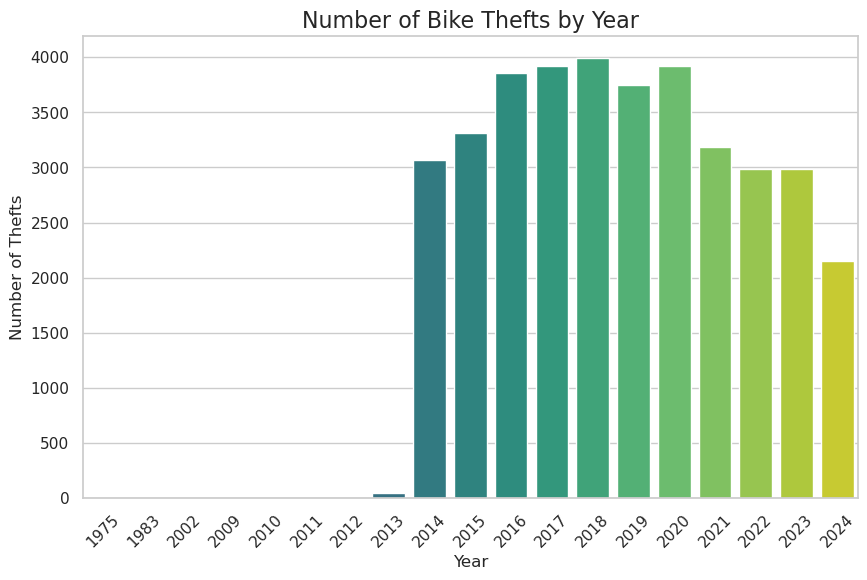

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for aesthetics
sns.set(style="whitegrid")

# 1. Bike theft by year
plt.figure(figsize=(10, 6))
sns.countplot(x="OCC_YEAR", data=df, palette="viridis")
plt.title("Number of Bike Thefts by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Thefts", fontsize=12)
plt.xticks(rotation=45)
plt.show()



/tmp/ipykernel_86/1397261178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="STATUS", data=df, palette="coolwarm")


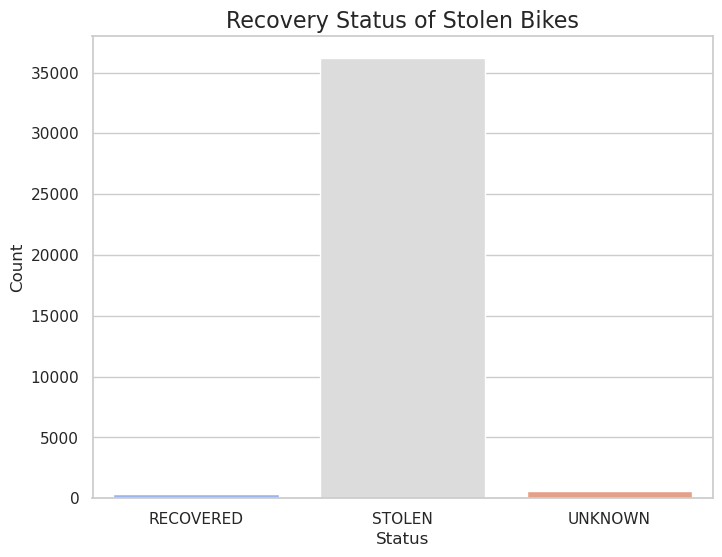

In [6]:
# 2. Bike theft status pie chart (enhanced bar plot to replace pie)
plt.figure(figsize=(8, 6))
sns.countplot(x="STATUS", data=df, palette="coolwarm")
plt.title("Recovery Status of Stolen Bikes", fontsize=16)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

/tmp/ipykernel_86/3951353520.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="OCC_MONTH", y="BIKE_COST", data=df, order=order, palette="mako", ci=None)
/tmp/ipykernel_86/3951353520.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="OCC_MONTH", y="BIKE_COST", data=df, order=order, palette="mako", ci=None)


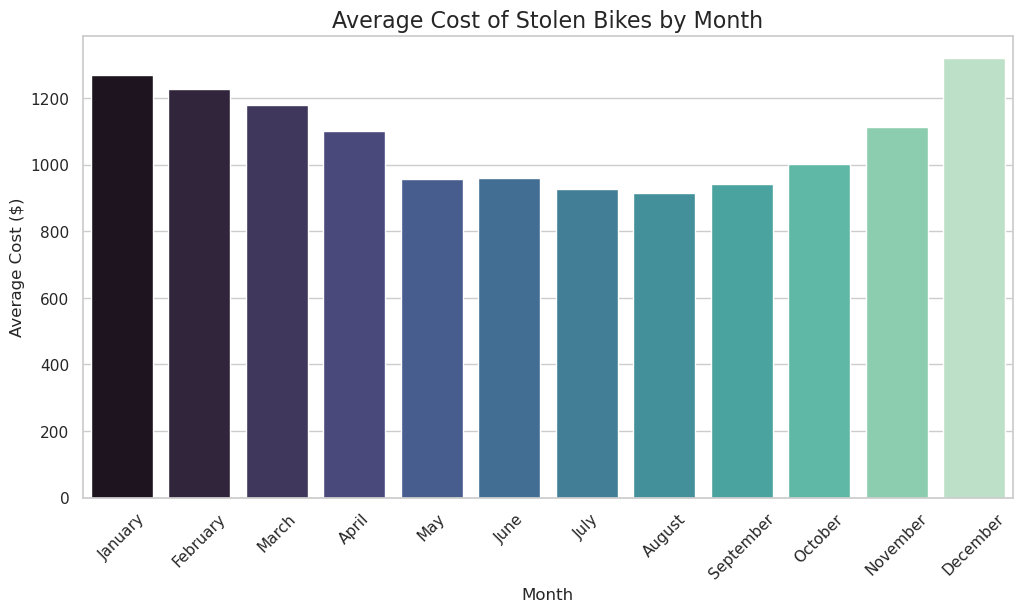

In [8]:
# 3. Average bike cost by month
plt.figure(figsize=(12, 6))
order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
sns.barplot(x="OCC_MONTH", y="BIKE_COST", data=df, order=order, palette="mako", ci=None)
plt.title("Average Cost of Stolen Bikes by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Cost ($)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

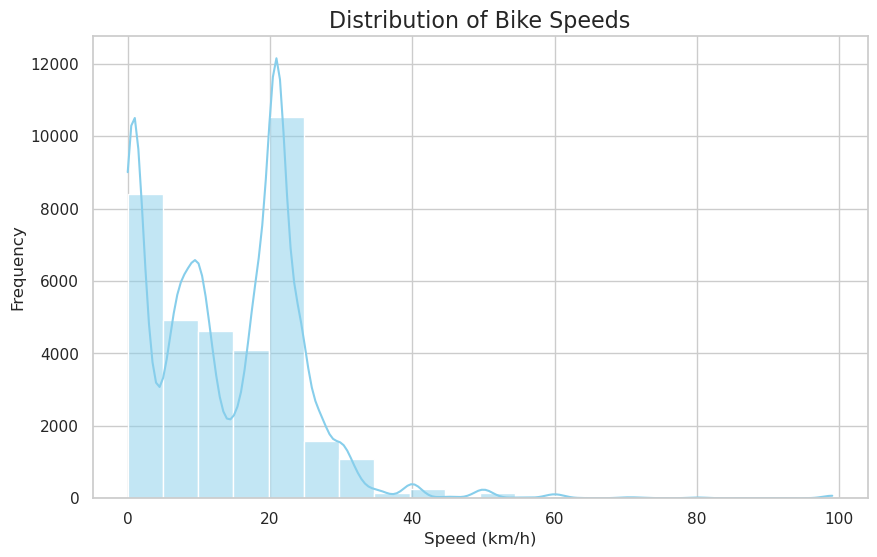

In [10]:
# 4. Distribution of bike speeds
plt.figure(figsize=(10, 6))
sns.histplot(df["BIKE_SPEED"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Bike Speeds", fontsize=16)
plt.xlabel("Speed (km/h)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

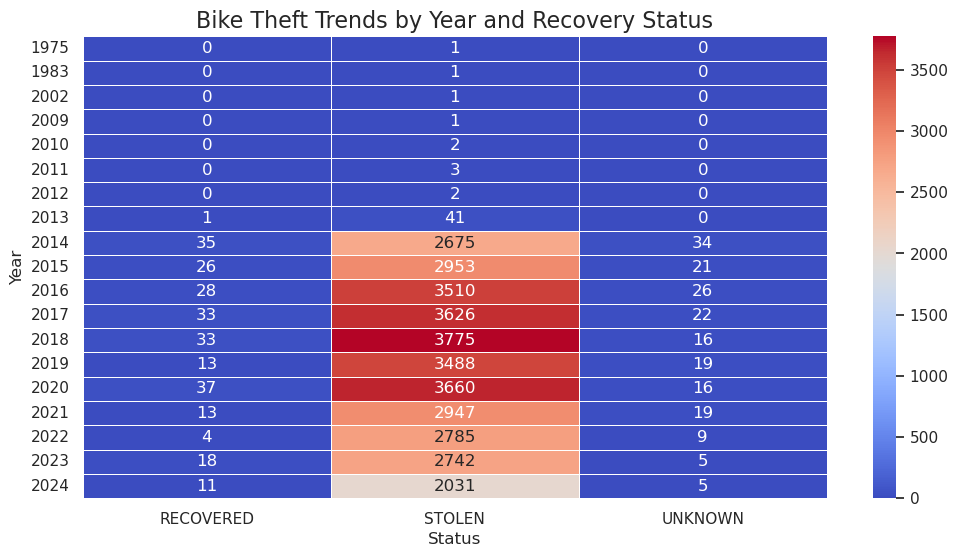

In [12]:
# 5. Heatmap of theft trends
pivot_table = pd.pivot_table(df, values="BIKE_COST", 
                             index="OCC_YEAR", columns="STATUS", aggfunc="count", fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Bike Theft Trends by Year and Recovery Status", fontsize=16)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.show()